In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os
#### INSTRUCTIONS FOR I/O (PLEASE READ) #######
# Input data files are available in the read-only "../input/" (relative) or '/kaggle/input'(absolute) directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
input_path = '2024-flame-ai-challenge/dataset/'
output_path = 'working/'

## Load Metadata

In [2]:
train_df = pd.read_csv(os.path.join(input_path,'train.csv'))
train_df.head()

,id,u,alpha,Nt,Nx,Ny,theta_filename,ustar_filename,xi_filename
0,804025,2,10,150,113,32,theta_K_id804025.dat,ustar_ms-1_id804025.dat,xi_id804025.dat
1,875935,2,5,150,113,32,theta_K_id875935.dat,ustar_ms-1_id875935.dat,xi_id875935.dat
2,930086,6,0,150,113,32,theta_K_id930086.dat,ustar_ms-1_id930086.dat,xi_id930086.dat
3,661713,4,5,150,113,32,theta_K_id661713.dat,ustar_ms-1_id661713.dat,xi_id661713.dat
4,633229,2,0,150,113,32,theta_K_id633229.dat,ustar_ms-1_id633229.dat,xi_id633229.dat


In [37]:
# load data
def load_dataX(idx):
    csv_file = train_df.reset_index().to_dict(orient='list')
    dir_path = os.path.join(input_path, "train")
    id = csv_file['id'][idx]
    print('id is ', id)
    nt, Nx, Ny = csv_file['Nt'][idx], csv_file['Nx'][idx], csv_file['Ny'][idx]
    print('nt is ', nt)
    print('Nx is ', Nx)
    print('Ny is ', Ny)
    theta = np.fromfile(os.path.join(dir_path, csv_file['theta_filename'][idx]), dtype="<f4").reshape(nt, Nx, Ny)
    ustar = np.fromfile(os.path.join(dir_path, csv_file['ustar_filename'][idx]), dtype="<f4").reshape(nt, Nx, Ny)
    xi_f = np.fromfile(os.path.join(dir_path, csv_file['xi_filename'][idx]), dtype="<f4").reshape(nt, Nx, Ny)
    uin  = csv_file['u'][idx]
    alpha = csv_file['alpha'][idx]

    return theta, ustar, xi_f, uin, alpha

In [38]:
idx = 0
theta, ustar, xi_f, uin, alpha = load_dataX(idx)

id is  804025
nt is  150
Nx is  113
Ny is  32


In [34]:
# 113 * 32: theta(temperature), ustar(), xi_f(fire location)
# scalar: alpha(terrain slope), uin(wind speed) 
print(xi_f[0])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Data visualization

In [21]:
def generate_video(theta, ustar, xi_f):
    for i in range(len(theta)):
        fig, axs = plt.subplots(3, 1, figsize=(10, 8))
        im0 = axs[0].imshow(theta[i].T, cmap='inferno')
        axs[0].set_title('theta')
        cbar = fig.colorbar(im0, ax=axs[0], orientation='horizontal')

        im1 = axs[1].imshow(ustar[i].T, cmap='viridis')
        axs[1].set_title('ustar')
        cbar = fig.colorbar(im1, ax = axs[1], orientation='horizontal')

        im2 = axs[2].imshow(xi_f[i].T, vmin=0, vmax=1, cmap='cividis')
        axs[2].set_title('xi_f')
        cbar = fig.colorbar(im2, ax=axs[2], orientation='horizontal')
        for ax in axs:
            ax.axis('off')
        fig.tight_layout()
        plt.savefig("working/img/file%02d.png"%i)

#     os.chdir("working")
#     os.system("""ffmpeg -i img/file%02d -c:v libx264 -r 25 -pix_fmt yuv420p out.mp4 
#     """)

In [8]:
frames = len(theta)
print(frames)

150


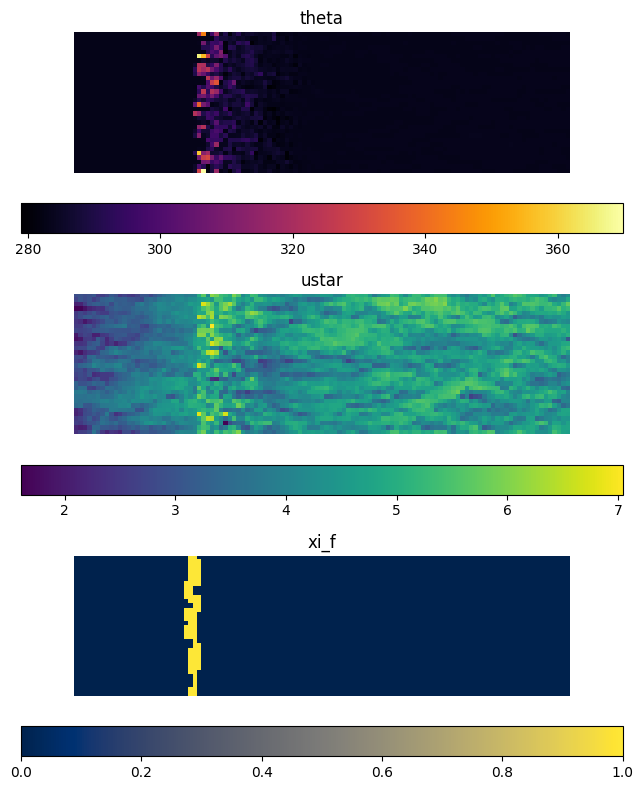

In [5]:
frame = 30
fig, axs = plt.subplots(3, 1, figsize=(10, 8))
im0 = axs[0].imshow(theta[frame].T, cmap='inferno')
axs[0].set_title('theta')
cbar = fig.colorbar(im0, ax=axs[0], orientation='horizontal')

im1 = axs[1].imshow(ustar[frame].T, cmap='viridis')
axs[1].set_title('ustar')
cbar = fig.colorbar(im1, ax = axs[1], orientation='horizontal')

im2 = axs[2].imshow(xi_f[frame].T, vmin=0, vmax=1, cmap='cividis')
axs[2].set_title('xi_f')
cbar = fig.colorbar(im2, ax=axs[2], orientation='horizontal')
for ax in axs:
    ax.axis('off')
fig.tight_layout()